In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
cd = pd.read_csv("sample_data/Country-data.csv")

In [ ]:
cd.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
X = cd.drop(columns = ["country"])
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
X.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [ ]:
X.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


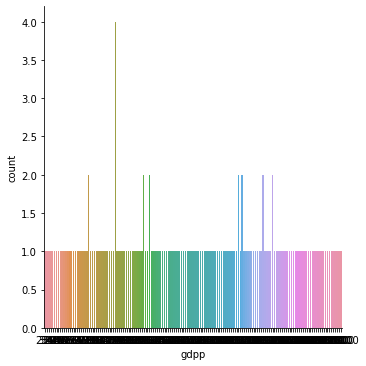

In [ ]:
sns.catplot(data = cd , x = "gdpp", kind = 'count')
plt.show()

<Figure size 1440x3600 with 0 Axes>

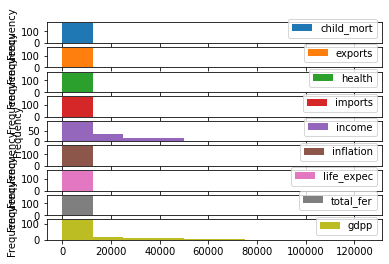

In [ ]:
fig = plt.figure(figsize = (20,50))
X.plot(kind = "hist", subplots = True)
plt.show()

# 1. K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = [1,2,3,4,5,6,7,8,9,10]
ssd = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(X)
    ssd.append(model.inertia_)

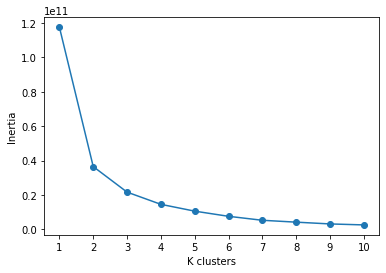

In [ ]:
plt.plot(k, ssd, marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
model = KMeans(n_clusters = 4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([0, 0, 0, 0, 3, 3, 0, 1, 1, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0,
       3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 0, 0, 0, 0, 3, 0, 3, 0, 1, 1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 3, 0, 1, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 0,
       0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 3, 0, 0, 0, 3, 3, 2, 3, 3, 0, 0, 1, 0, 0, 3,
       0, 1, 3, 3, 0, 0, 3, 1, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 1, 1, 1, 3, 0, 0, 3, 0, 0, 0], dtype=int32)

In [ ]:
model.n_iter_

7

In [ ]:
model.cluster_centers_

array([[5.83562500e+01, 3.19104063e+01, 6.23031250e+00, 4.57621448e+01,
        5.26628125e+03, 9.41454167e+00, 6.56885417e+01, 3.70322917e+00,
        2.43368750e+03],
       [5.76296296e+00, 5.28851852e+01, 8.54148148e+00, 4.47555556e+01,
        4.45777778e+04, 3.91570370e+00, 7.99518519e+01, 1.91925926e+00,
        3.99370370e+04],
       [4.87500000e+00, 8.52500000e+01, 7.64000000e+00, 6.19000000e+01,
        8.36250000e+04, 4.21675000e+00, 8.10000000e+01, 1.79250000e+00,
        8.44250000e+04],
       [1.53450000e+01, 5.08225000e+01, 6.97325000e+00, 4.95375000e+01,
        2.04875000e+04, 6.82947500e+00, 7.48500000e+01, 1.94525000e+00,
        1.28845000e+04]])

In [ ]:
data = cd
data["Final Label"] = model.labels_

In [ ]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Final Label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [ ]:
X = cd[["exports","gdpp"]]
X.head()

,exports,gdpp
0,10.0,553
1,28.0,4090
2,38.4,4460
3,62.3,3530
4,45.5,12200


In [ ]:
k = [1,2,3,4,5,6,7,8,9,10]
ssd = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(X)
    ssd.append(model.inertia_)

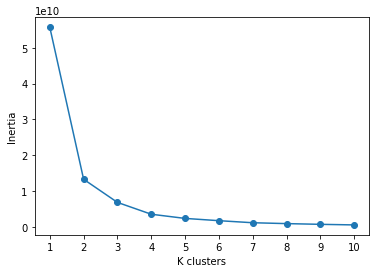

In [ ]:
plt.plot(k, ssd, marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
model = KMeans(n_clusters = 4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
model.n_iter_

8

In [ ]:
model.cluster_centers_

array([[3.40436273e+01, 3.11012727e+03],
       [5.17958333e+01, 4.24583333e+04],
       [5.29758621e+01, 1.60758621e+04],
       [8.52500000e+01, 8.44250000e+04]])

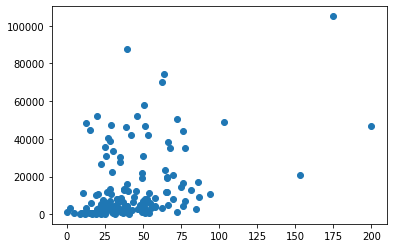

In [ ]:
plt.scatter(cd["exports"], cd["gdpp"])
plt.show()

In [ ]:
centroid = model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[  34.04362727 3110.12727273]
[   51.79583333 42458.33333333]
[   52.97586207 16075.86206897]
[   85.25 84425.  ]


(4, 2)

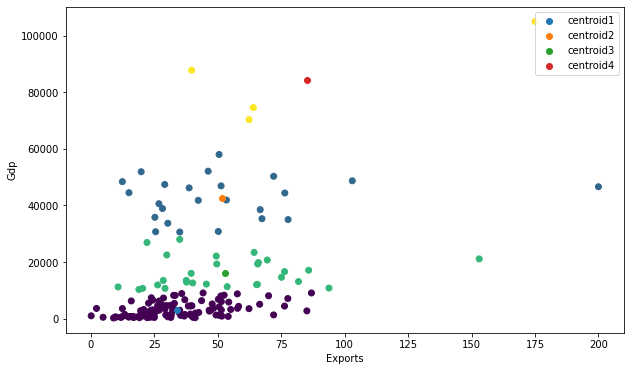

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.scatter(cd["exports"], cd["gdpp"], c = model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0], centroid[i][1], label = "centroid"+str(i+1))
plt.xlabel("Exports")
plt.ylabel("Gdp")
plt.legend()
plt.show()

# 2. Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [ ]:
X = cd.drop(columns = ["country"])
 
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Final Label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


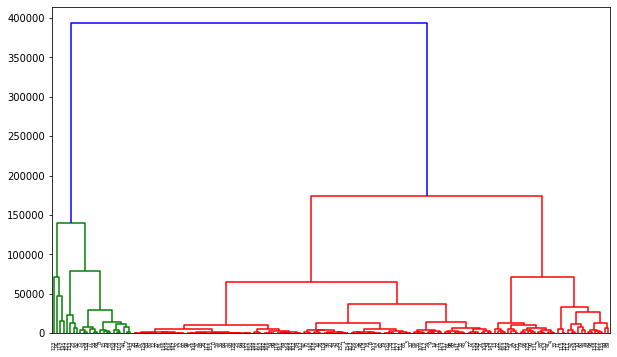

In [ ]:
fig = plt.figure(figsize=(10,6))
den = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters = 2)
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
 model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X = cd[["exports","gdpp"]]

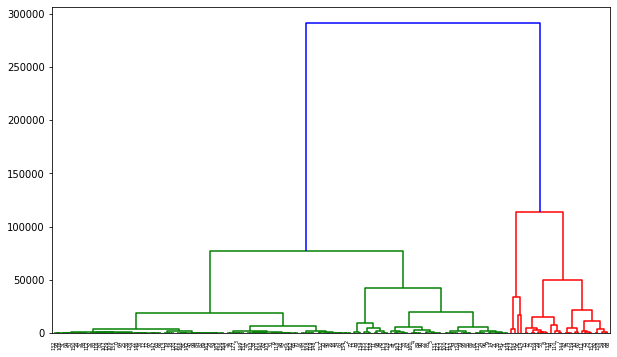

In [ ]:
fig = plt.figure(figsize = (10,6))
den = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters = 2)
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

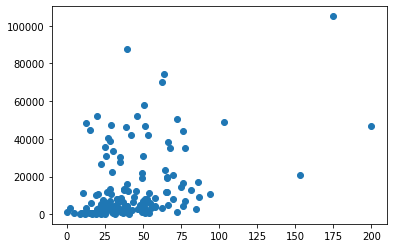

In [ ]:
plt.scatter(x = X.exports, y = X.gdpp)
plt.show()

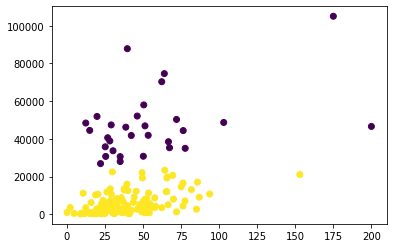

In [ ]:
plt.scatter(x = X.exports, y = X.gdpp, c = model.labels_)
plt.show()